In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from prepare_data import preprocess, get_covid_data, add_covid_data, get_holidays_data, add_jours_feries, add_school_holidays

In [3]:
args = {
    "data_covid": '../../data/covid_data/OxCGRT_latest.csv',
    'data_holidays': '../../data/data_holidays',
    'data_polution': '../../data/polution2019',
    'data_meteo': '../../data/meteo',
    'raw_data': '../../data/raw_data',
    'output': '../../data/final_data'
}


In [4]:
raw_convention = pd.read_csv(
    os.path.join(args['raw_data'], 'comptages-routiers-permanents-convention.csv'),
    sep=";")
raw_champs = pd.read_csv(
    os.path.join(args['raw_data'], 'comptages-routiers-permanents-champs.csv'),
    sep=";")
raw_peres = pd.read_csv(
    os.path.join(args['raw_data'], 'comptages-routiers-permanents-peres.csv'),
    sep=";")

In [5]:
data_convention = preprocess(raw_convention)
data_champs = preprocess(raw_champs)
data_peres = preprocess(raw_peres)
data_convention.tail()

,Débit horaire,Taux d'occupation,datetime,year,month,day,hour,dayofweek
Date et heure de comptage,,,,,,,,
2020-12-10 19:00:00+00:00,847.0,4.82889,2020-12-10 19:00:00+00:00,2020,12,10,19,3
2020-12-10 20:00:00+00:00,682.0,3.97445,2020-12-10 20:00:00+00:00,2020,12,10,20,3
2020-12-10 21:00:00+00:00,450.0,2.30889,2020-12-10 21:00:00+00:00,2020,12,10,21,3
2020-12-10 22:00:00+00:00,278.0,1.68722,2020-12-10 22:00:00+00:00,2020,12,10,22,3
2020-12-10 23:00:00+00:00,245.0,1.56945,2020-12-10 23:00:00+00:00,2020,12,10,23,3


## Add Covid data

In [6]:
data_france = get_covid_data(path=args['data_covid'])
data_france.head()

,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,StringencyLegacyIndexForDisplay,ContainmentHealthIndexForDisplay
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data_convention_covid = add_covid_data(data_convention, data_france)
data_champs_covid = add_covid_data(data_champs, data_france)
data_peres_covid = add_covid_data(data_peres, data_france)

data_convention_covid.tail()

,Débit horaire,Taux d'occupation,datetime,year,month,day,hour,dayofweek,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,StringencyLegacyIndexForDisplay,ContainmentHealthIndexForDisplay
9736,847.0,4.82889,2020-12-10 19:00:00+00:00,2020,12,10,19,3,2020-12-10,2.0,2.0,2.0,4.0,0.0,2.0,2.0,75.0,74.04
9737,682.0,3.97445,2020-12-10 20:00:00+00:00,2020,12,10,20,3,2020-12-10,2.0,2.0,2.0,4.0,0.0,2.0,2.0,75.0,74.04
9738,450.0,2.30889,2020-12-10 21:00:00+00:00,2020,12,10,21,3,2020-12-10,2.0,2.0,2.0,4.0,0.0,2.0,2.0,75.0,74.04
9739,278.0,1.68722,2020-12-10 22:00:00+00:00,2020,12,10,22,3,2020-12-10,2.0,2.0,2.0,4.0,0.0,2.0,2.0,75.0,74.04
9740,245.0,1.56945,2020-12-10 23:00:00+00:00,2020,12,10,23,3,2020-12-10,2.0,2.0,2.0,4.0,0.0,2.0,2.0,75.0,74.04


## Add Holiday data

In [8]:
data_vacance_scolaire ,data_jours_feries = get_holidays_data(path=args["data_holidays"])

In [9]:
data_jours_feries["nom_jour_ferie"]

0         1er janvier
1      Lundi de Pques
2             1er mai
3               8 mai
4           Ascension
            ...      
281        14 juillet
282        Assomption
283         Toussaint
284       11 novembre
285       Jour de Nol
Name: nom_jour_ferie, Length: 286, dtype: object

In [10]:
data_champs_covid_holidays = add_jours_feries(data_champs_covid, data_jours_feries)
data_convention_covid_holidays = add_jours_feries(data_convention_covid, data_jours_feries)
data_peres_covid_holidays = add_jours_feries(data_peres_covid, data_jours_feries)

In [11]:
data_champs_covid_holidays = add_school_holidays(data_champs_covid_holidays)
data_convention_covid_holidays = add_school_holidays(data_convention_covid_holidays)
data_peres_covid_holidays = add_school_holidays(data_peres_covid_holidays)

In [12]:
data_champs_covid_holidays.nom_jour_ferie.fillna('pas_ferie', inplace=True)
data_convention_covid_holidays.nom_jour_ferie.fillna('pas_ferie', inplace=True)
data_peres_covid_holidays.nom_jour_ferie.fillna('pas_ferie', inplace=True)

data_champs_covid_holidays.nom_vacance_scolaire.fillna('pas_vacance', inplace=True)
data_convention_covid_holidays.nom_vacance_scolaire.fillna('pas_vacance', inplace=True)
data_peres_covid_holidays.nom_vacance_scolaire.fillna('pas_vacance', inplace=True)

In [13]:
data_champs_covid_holidays["nom_jour_ferie"] = data_champs_covid_holidays["nom_jour_ferie"].astype("category")
ferie_classes = data_champs_covid_holidays["nom_jour_ferie"].cat.categories
data_champs_covid_holidays["nom_jour_ferie"] = data_champs_covid_holidays["nom_jour_ferie"].cat.codes
data_convention_covid_holidays["nom_jour_ferie"] = data_convention_covid_holidays["nom_jour_ferie"].astype("category").cat.codes
data_peres_covid_holidays["nom_jour_ferie"] = data_peres_covid_holidays["nom_jour_ferie"].astype("category").cat.codes
ferie_classes

Index(['11 novembre', '14 juillet', '1er janvier', '1er mai', '8 mai',
       'Ascension', 'Assomption', 'Jour de Nol', 'Lundi de Pentecte',
       'Lundi de Pques', 'Toussaint', 'pas_ferie'],
      dtype='object')

In [14]:
data_champs_covid_holidays["nom_vacance_scolaire"] = data_champs_covid_holidays["nom_vacance_scolaire"].astype("category")
vacance_classes = data_champs_covid_holidays["nom_vacance_scolaire"].cat.categories
data_champs_covid_holidays["nom_vacance_scolaire"] = data_champs_covid_holidays["nom_vacance_scolaire"].cat.codes
data_convention_covid_holidays["nom_vacance_scolaire"] = data_convention_covid_holidays["nom_vacance_scolaire"].astype("category").cat.codes
data_peres_covid_holidays["nom_vacance_scolaire"] = data_peres_covid_holidays["nom_vacance_scolaire"].astype("category").cat.codes
vacance_classes

Index(['ascension', 'ete', 'hiver', 'noel', 'pas_vacance', 'printemps',
       'toussaint'],
      dtype='object')

In [15]:
data_champs_covid_holidays.head()

,Débit horaire,Taux d'occupation,datetime,year,month,day,hour,dayofweek,Date,C1_School closing,...,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,StringencyLegacyIndexForDisplay,ContainmentHealthIndexForDisplay,nom_jour_ferie,jour_ferie,nom_vacance_scolaire,vacance_scolaire
0,746.0,10.98889,2019-11-01 03:00:00+00:00,2019,11,1,3,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,4,0
1,549.0,7.40722,2019-11-01 04:00:00+00:00,2019,11,1,4,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,4,0
2,503.0,7.66667,2019-11-01 05:00:00+00:00,2019,11,1,5,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,4,0
3,500.0,4.75500,2019-11-01 06:00:00+00:00,2019,11,1,6,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,4,0
4,525.0,5.37389,2019-11-01 07:00:00+00:00,2019,11,1,7,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,4,0


## Add Meteo data

## Save data

In [16]:
data_champs_covid_holidays.to_csv(os.path.join(args['output'], 'final_champs.csv'), sep=';')
data_convention_covid_holidays.to_csv(os.path.join(args['output'], 'final_convention.csv'), sep=';')
data_peres_covid_holidays.to_csv(os.path.join(args['output'], 'final_peres.csv'), sep=';')
np.savetxt(os.path.join(args['output'], 'ferie_correspondance.csv'), ferie_classes.to_numpy(), fmt="%s")
np.savetxt(os.path.join(args['output'], 'vacance_correspondance.csv'), vacance_classes.to_numpy(), fmt="%s")

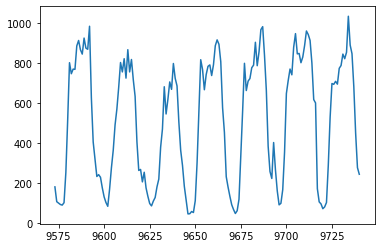

In [17]:
data_convention_covid_holidays.iloc[-168:]["Débit horaire"].plot()